In [1]:
import pandas as pd
import re
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
ingredients_categories = {
    '151 proof rum': 'alkohol',
    '7-up': 'napój',
    'absinthe': 'alkohol',
    'absolut citron': 'alkohol',
    'absolut kurant': 'alkohol',
    'absolut peppar': 'alkohol',
    'absolut vodka': 'alkohol',
    'advocaat': 'alkohol',
    'agave syrup': 'inny dodatek',
    'allspice': 'inny dodatek',
    'almond flavoring': 'inny dodatek',
    'amaretto': 'alkohol',
    'amaro montenegro': 'alkohol',
    'angostura bitters': 'inny dodatek',
    'anis': 'inny dodatek',
    'anisette': 'alkohol',
    'aperol': 'alkohol',
    'apfelkorn': 'alkohol',
    'apple': 'inny dodatek',
    'apple brandy': 'alkohol',
    'apple juice': 'napój',
    'applejack': 'alkohol',
    'apricot brandy': 'alkohol',
    'apricot nectar': 'napój',
    'asafoetida': 'inny dodatek',
    'añejo rum': 'alkohol',
    'bacardi limon': 'alkohol',
    'baileys irish cream': 'alkohol',
    'banana': 'inny dodatek',
    'banana liqueur': 'alkohol',
    'beer': 'napój',
    'benedictine': 'alkohol',
    'bitter lemon': 'napój',
    'bitters': 'inny dodatek',
    'black sambuca': 'alkohol',
    'blackberries': 'inny dodatek',
    'blackberry brandy': 'alkohol',
    'blackcurrant cordial': 'alkohol',
    'blackstrap rum': 'alkohol',
    'blended scotch': 'alkohol',
    'blended whiskey': 'alkohol',
    'blood orange': 'inny dodatek',
    'blue curacao': 'alkohol',
    'blueberry schnapps': 'alkohol',
    'bourbon': 'alkohol',
    'brandy': 'alkohol',
    'brown sugar': 'inny dodatek',
    'butter': 'inny dodatek',
    'butterscotch schnapps': 'alkohol',
    'cachaca': 'alkohol',
    'campari': 'alkohol',
    'carbonated soft drink': 'napój',
    'carbonated water': 'napój',
    'cardamom': 'inny dodatek',
    'cayenne pepper': 'inny dodatek',
    'celery salt': 'inny dodatek',
    'chambord raspberry liqueur': 'alkohol',
    'champagne': 'alkohol',
    'cherry': 'inny dodatek',
    'cherry brandy': 'alkohol',
    'cherry heering': 'alkohol',
    'cherry juice': 'napój',
    'cherry liqueur': 'alkohol',
    'chocolate': 'inny dodatek',
    'chocolate liqueur': 'alkohol',
    'chocolate syrup': 'inny dodatek',
    'cider': 'napój',
    'cinnamon': 'inny dodatek',
    'cloves': 'inny dodatek',
    'club soda': 'napój',
    'coca-cola': 'napój',
    'cocoa powder': 'inny dodatek',
    'coconut liqueur': 'alkohol',
    'coconut milk': 'napój',
    'coconut syrup': 'inny dodatek',
    'coffee': 'napój',
    'coffee brandy': 'alkohol',
    'coffee liqueur': 'alkohol',
    'cognac': 'alkohol',
    'cointreau': 'alkohol',
    'condensed milk': 'inny dodatek',
    'coriander': 'inny dodatek',
    'corn syrup': 'inny dodatek',
    'corona': 'napój',
    'cranberry juice': 'napój',
    'cranberry vodka': 'alkohol',
    'cream': 'inny dodatek',
    'cream of coconut': 'inny dodatek',
    'creme de banane': 'alkohol',
    'creme de cacao': 'alkohol',
    'creme de cassis': 'alkohol',
    'creme de mure': 'alkohol',
    'crown royal': 'alkohol',
    'cucumber': 'inny dodatek',
    'cumin seed': 'inny dodatek',
    'daiquiri mix': 'inny dodatek',
    'dark creme de cacao': 'alkohol',
    'dark rum': 'alkohol',
    'demerara sugar': 'inny dodatek',
    'dr. pepper': 'napój',
    'drambuie': 'alkohol',
    'dry vermouth': 'alkohol',
    'dubonnet rouge': 'alkohol',
    'egg': 'inny dodatek',
    'egg white': 'inny dodatek',
    'egg yolk': 'inny dodatek',
    'elderflower cordial': 'alkohol',
    'espresso': 'napój',
    'everclear': 'alkohol',
    'falernum': 'alkohol',
    'figs': 'inny dodatek',
    'firewater': 'alkohol',
    'frangelico': 'alkohol',
    'fresh lemon juice': 'inny dodatek',
    'fresh lime juice': 'inny dodatek',
    'fruit': 'inny dodatek',
    'fruit juice': 'napój',
    'fruit punch': 'napój',
    'galliano': 'alkohol',
    'gin': 'alkohol',
    'ginger': 'inny dodatek',
    'ginger ale': 'napój',
    'ginger beer': 'napój',
    'ginger syrup': 'inny dodatek',
    'godiva liqueur': 'alkohol',
    'gold rum': 'alkohol',
    'goldschlager': 'alkohol',
    'grain alcohol': 'alkohol',
    'grand marnier': 'alkohol',
    'grape juice': 'napój',
    'grape soda': 'napój',
    'grapefruit juice': 'napój',
    'green chartreuse': 'alkohol',
    'green creme de menthe': 'alkohol',
    'grenadine': 'inny dodatek',
    'guinness stout': 'napój',
    'half-and-half': 'inny dodatek',
    'heavy cream': 'inny dodatek',
    'honey': 'inny dodatek',
    'honey syrup': 'inny dodatek',
    'hot chocolate': 'napój',
    'hot damn': 'alkohol',
    'hot sauce': 'inny dodatek',
    'ice': 'inny dodatek',
    'iced tea': 'napój',
    'irish cream': 'alkohol',
    'irish whiskey': 'alkohol',
    'islay single malt scotch': 'alkohol',
    'jack daniels': 'alkohol',
    'jagermeister': 'alkohol',
    'jello': 'inny dodatek',
    'jim beam': 'alkohol',
    'johnnie walker': 'alkohol',
    'jägermeister': 'alkohol',
    'kahlua': 'alkohol',
    'kiwi': 'inny dodatek',
    'kiwi liqueur': 'alkohol',
    'kool-aid': 'napój',
    'lager': 'napój',
    'lemon': 'inny dodatek',
    'lemon juice': 'inny dodatek',
    'lemon peel': 'inny dodatek',
    'lemon-lime soda': 'napój',
    'lemonade': 'napój',
    'light cream': 'inny dodatek',
    'light rum': 'alkohol',
    'lillet': 'alkohol',
    'lillet blanc': 'alkohol',
    'lime': 'inny dodatek',
    'lime juice': 'inny dodatek',
    'lime peel': 'inny dodatek',
    'lime vodka': 'alkohol',
    'limeade': 'napój',
    'malibu rum': 'alkohol',
    'mango': 'inny dodatek',
    'maple syrup': 'inny dodatek',
    'maraschino cherry': 'inny dodatek',
    'maraschino liqueur': 'alkohol',
    'marshmallows': 'inny dodatek',
    'melon liqueur': 'alkohol',
    'mezcal': 'alkohol',
    'midori melon liqueur': 'alkohol',
    'milk': 'napój',
    'mint': 'inny dodatek',
    'mint syrup': 'inny dodatek',
    'mountain dew': 'napój',
    'nutmeg': 'inny dodatek',
    'olive': 'inny dodatek',
    'olive brine': 'inny dodatek',
    'orange': 'inny dodatek',
    'orange bitters': 'inny dodatek',
    'orange curacao': 'alkohol',
    'orange juice': 'napój',
    'orange peel': 'inny dodatek',
    'orange spiral': 'inny dodatek',
    'oreo cookie': 'inny dodatek',
    'orgeat syrup': 'inny dodatek',
    'ouzo': 'alkohol',
    'papaya': 'inny dodatek',
    'passion fruit juice': 'napój',
    'passion fruit syrup': 'inny dodatek',
    'passoa': 'alkohol',
    'peach bitters': 'inny dodatek',
    'peach brandy': 'alkohol',
    'peach nectar': 'napój',
    'peach schnapps': 'alkohol',
    'peach vodka': 'alkohol',
    'peachtree schnapps': 'alkohol',
    'pepper': 'inny dodatek',
    'pepsi cola': 'napój',
    'pernod': 'alkohol',
    'peychaud bitters': 'inny dodatek',
    'pina colada mix': 'inny dodatek',
    'pineapple': 'inny dodatek',
    'pineapple juice': 'napój',
    'pineapple syrup': 'inny dodatek',
    'pink lemonade': 'napój',
    'pisang ambon': 'alkohol',
    'pisco': 'alkohol',
    'pomegranate juice': 'napój',
    'port': 'alkohol',
    'powdered sugar': 'inny dodatek',
    'prosecco': 'alkohol',
    'raspberry liqueur': 'alkohol',
    'raspberry syrup': 'inny dodatek',
    'raspberry vodka': 'alkohol',
    'red chili flakes': 'inny dodatek',
    'red wine': 'alkohol',
    'ricard': 'alkohol',
    'root beer': 'napój',
    'rose': 'inny dodatek',
    'rosemary': 'inny dodatek',
    'rosemary syrup': 'inny dodatek',
    'roses sweetened lime juice': 'inny dodatek',
    'rosso vermouth': 'alkohol',
    'ruby port': 'alkohol',
    'rum': 'alkohol',
    'rumple minze': 'alkohol',
    'rye whiskey': 'alkohol',
    'salt': 'inny dodatek',
    'sambuca': 'alkohol',
    'sarsaparilla': 'napój',
    'schweppes russchian': 'napój',
    'scotch': 'alkohol',
    'sherbet': 'inny dodatek',
    'sherry': 'alkohol',
    'sirup of roses': 'inny dodatek',
    'sloe gin': 'alkohol',
    'soda water': 'napój',
    'sour mix': 'inny dodatek',
    'southern comfort': 'alkohol',
    'spiced rum': 'alkohol',
    'sprite': 'napój',
    'st. germain': 'alkohol',
    'strawberries': 'inny dodatek',
    'strawberry liqueur': 'alkohol',
    'strawberry schnapps': 'alkohol',
    'sugar': 'inny dodatek',
    'sugar syrup': 'inny dodatek',
    'surge': 'napój',
    'sweet and sour': 'inny dodatek',
    'sweet vermouth': 'alkohol',
    'tabasco sauce': 'inny dodatek',
    'tea': 'napój',
    'tennessee whiskey': 'alkohol',
    'tequila': 'alkohol',
    'thyme': 'inny dodatek',
    'tia maria': 'alkohol',
    'tomato juice': 'napój',
    'tonic water': 'napój',
    'triple sec': 'alkohol',
    'vanilla': 'inny dodatek',
    'vanilla extract': 'inny dodatek',
    'vanilla ice-cream': 'inny dodatek',
    'vanilla syrup': 'inny dodatek',
    'vanilla vodka': 'alkohol',
    'vermouth': 'alkohol',
    'vodka': 'alkohol',
    'water': 'napój',
    'whipped cream': 'inny dodatek',
    'whipping cream': 'inny dodatek',
    'whiskey': 'alkohol',
    'whisky': 'alkohol',
    'white creme de menthe': 'alkohol',
    'white rum': 'alkohol',
    'white wine': 'alkohol',
    'wild turkey': 'alkohol',
    'wine': 'alkohol',
    'worcestershire sauce': 'inny dodatek',
    'wormwood': 'inny dodatek',
    'yellow chartreuse': 'alkohol',
    'yoghurt': 'napój',
    'yukon jack': 'alkohol',
    'zima': 'napój'
}

In [3]:
df = pd.read_csv("API_data/drinks.csv")

df = df[["idDrink", "strDrink", "strCategory", "strAlcoholic", "strGlass", "strIngredient1", "strIngredient2", "strIngredient3", "strIngredient4", "strIngredient5"]]
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

df.head()

,idDrink,strDrink,strCategory,strAlcoholic,strGlass,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5
0,17222,a1,cocktail,alcoholic,cocktail glass,gin,grand marnier,lemon juice,grenadine,NaN
1,13501,abc,shot,alcoholic,shot glass,amaretto,baileys irish cream,cognac,NaN,NaN
2,17225,ace,cocktail,alcoholic,martini glass,gin,grenadine,heavy cream,milk,egg white
3,14610,acid,shot,alcoholic,shot glass,151 proof rum,wild turkey,NaN,NaN,NaN
4,17837,adam,ordinary drink,alcoholic,cocktail glass,dark rum,lemon juice,grenadine,NaN,NaN


In [4]:
# ta funkcja zamienia dataframe'a takiego jak wyzej na dataframe'a w takim formacie jakiego oczekuje hypernetx
def parse_df(df):
  H_dict = {"drink": [], "ingredient": [], "properties": []}

  ingredient_cols = [col for col in df.columns if re.match(r"strIngredient\d+", col)]

  for _, row in df.iterrows():
    drink = row["strDrink"]
    for ing in ingredient_cols:
      ingredient = row[ing]
      if pd.notna(ingredient):
        H_dict["drink"].append(drink)
        H_dict["ingredient"].append(ingredient)
        H_dict["properties"].append({"category": row["strCategory"], "alcoholic": row["strAlcoholic"], "glass": row["strGlass"]})

  H_df = pd.DataFrame(H_dict)

  return H_df

Stworzę 2 sieci:
1. Małą (15 składników) - służącą do wizualizacji i tłumaczenia
2. Dużą (441 składników) - do uogólniania analizy na całą sieć

In [5]:
H_small_df = parse_df(df.sample(15, random_state=13))
H_small = hnx.Hypergraph(H_small_df, edge_col="drink", node_col="ingredient", misc_cell_properties="properties")

/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

In [6]:
H_df = parse_df(df)
H = hnx.Hypergraph(H_df, edge_col="drink", node_col="ingredient", misc_cell_properties="properties")

/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

Wizualizacja małej sieci:

/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from t

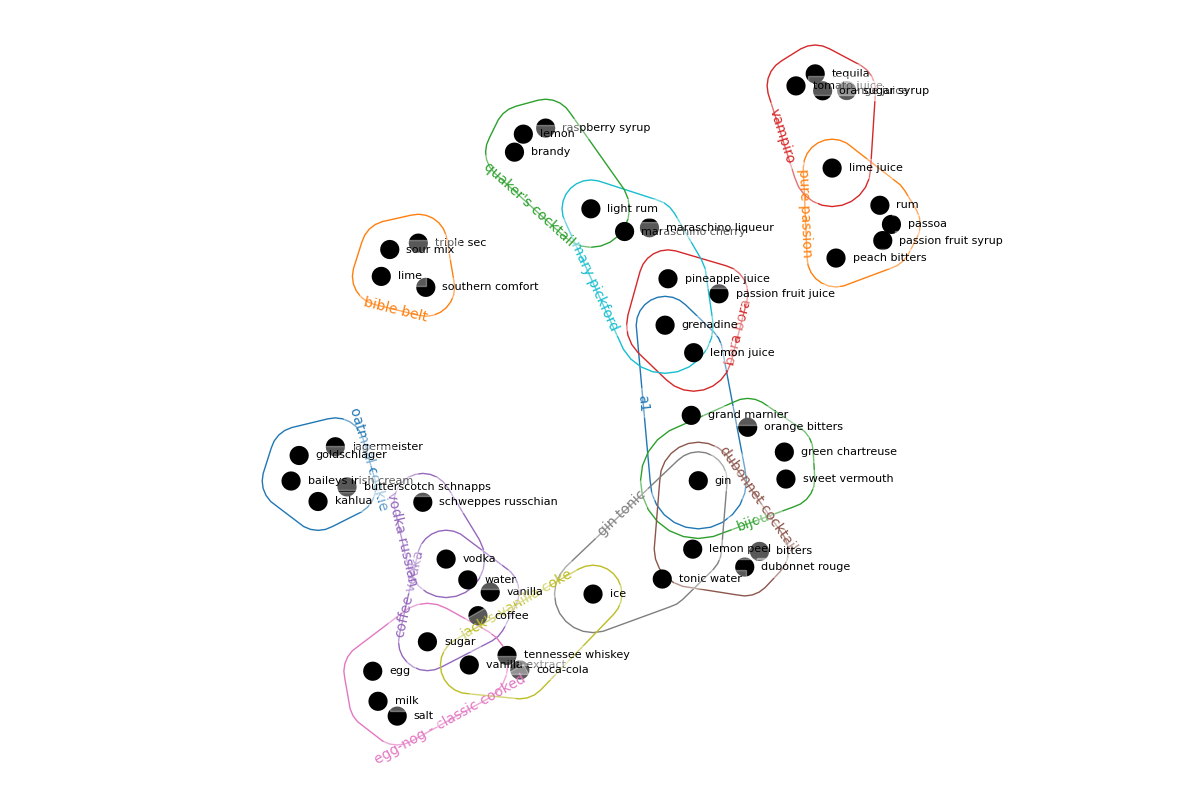

In [40]:
plt.figure(figsize=(15, 10))
hnx.draw(H_small, node_labels_kwargs={"fontsize": 8}, layout_kwargs={"seed": 314})

#### Analiza sąsiadów

Skupmy się na węźle "grenadine". Narysujmy uproszczoną wersję małej sieci, która będzie zawierać tylko węzęł "grenadine" i jego sąsiadów:

/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

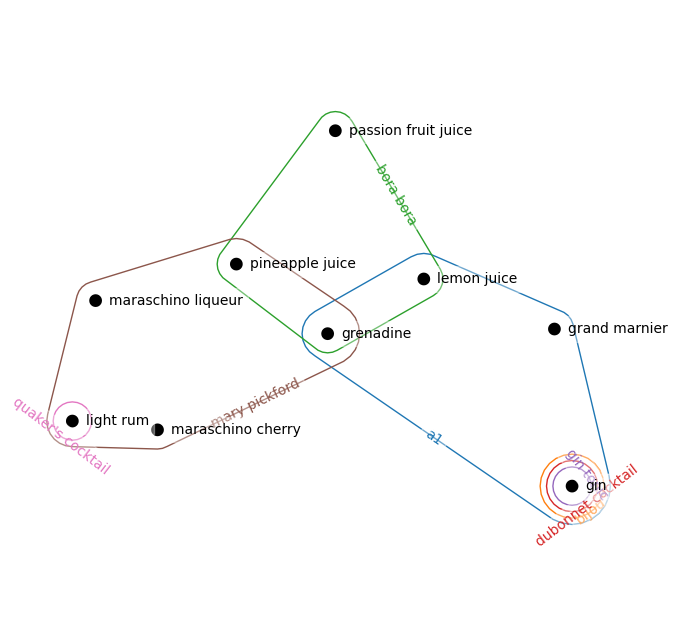

In [9]:
hnx.draw(H_small.restrict_to_nodes(["grenadine"] + list(H_small.neighbors("grenadine"))))

Metoda "neighbors" zwraca wszystkich sąsiadów węzła, czyli po prostu wszystkie węzły które są narysowane wyżej. W tym przypadku sąsiadów jest 8:

In [10]:
H_small.neighbors("grenadine")

['gin',
 'grand marnier',
 'lemon juice',
 'light rum',
 'maraschino cherry',
 'maraschino liqueur',
 'passion fruit juice',
 'pineapple juice']

Ale jak dodamy argument "s=2", to dostaniemy tylko "lemon juice" i "pineapple juice":

In [11]:
H_small.neighbors("grenadine", s=2)

['lemon juice', 'pineapple juice']

Wynika to z tego że "lemon juice" i "pineapple juice" są składnikami, które występują razem z "grenadine" w co najmniej 2 drinkach:
* "lemon juice" występuje z "grenadine" w drinkach "a1" i "bora bora"
* "pineapple juice" występuje z "grenadine" w drinkach "bora bora" i "mary pickford"

Wniosek jest taki, że chociaż "grenadine" ma 8 sąsiadów, to 2 z nich ("lemon juice" i "pineapple juice") są bardziej "blisko" niż pozostałe 6. Czyli "lemone juice" i "pineapple juice" pasują do "grenadine" najlepiej (w sensie że jak mamy "grenadine" w domu to najlepiej dodać do tego "lemon juice" albo "pineapple juice").

Uogólnijmy to na całą sieć:

In [44]:
H.neighbors("grenadine", s=14)

['gin']

Największe "s" dla jakiego zwracana jest niepusta lista wynosi 14. Zwracany jest "gin". Oznacza to, że "grenadine" i "gin" występują razem w 14 drinkach. Czyli "gin" najbardziej pasuje do "grenadine".

Możemy zatem napisać ogólną funkcję, która przyjmuję składnik i zwraca składnik (lub składniki) które najbardziej pasują do argumentu:

In [46]:
def get_best_complement(ing):
  i = 1
  while True:
    neighbors = list(H.neighbors(ing, s=i+1))
    if len(neighbors) == 0:
      return H.neighbors(ing, s=i), i
    i += 1

In [47]:
print(get_best_complement("passion fruit juice"))
print(get_best_complement("vodka"))

(['lime', 'vodka'], 2)
(['orange juice'], 11)


Możemy też znaleźć parę najbardziej pasujących do siebie składników:

In [48]:
best_ings = []
best_neighbors = []
max_s = 0

for ing in H.nodes:
    neighbors, s = get_best_complement(ing)
    if s > max_s:
        max_s = s
        best_ings = [ing]
        best_neighbors = [neighbors]
    elif s == max_s:
        best_ings.append(ing)
        best_neighbors.append(neighbors)

print("Max S:", max_s)
for ing, neighbors in zip(best_ings, best_neighbors):
    print("Składnik:", ing)
    print("Sąsiedzi:", neighbors)

Max S: 19
Składnik: lemon juice
Sąsiedzi: ['gin']
Składnik: gin
Sąsiedzi: ['lemon juice']


Wypisało się 2 razy, bo "gin" to najlepszy składnik dla "lemon juice" a "lemon juice" to najlepszy składnik dla "gin". Ale wniosek jest z tego taki, ze w tym zbiorze danych 2 najbardziej pasujące do siebie składniki to "gin" i "lemon juice". Występują one razem w 19 drinkach.

Poza tym, możemy też dla danego składnika narysować wykres mówiący o tym ile jest innych składników, które dzielą n drinków z danym składnikiem. Na przykładzie "grenadine":

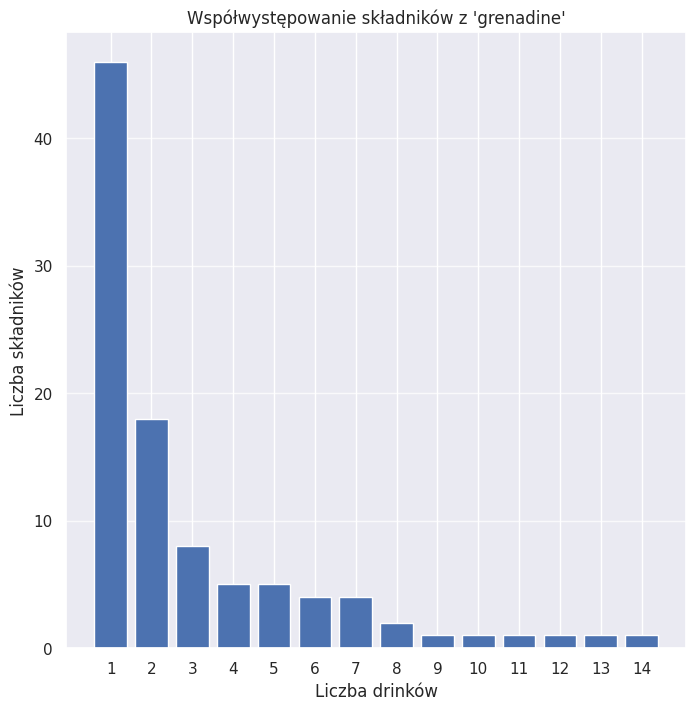

In [49]:
x_range = range(1, get_best_complement("grenadine")[1] + 1)
num_of_complements = [len(H.neighbors("grenadine", s=i)) for i in x_range]

plt.bar(x_range, num_of_complements)
plt.xlabel("Liczba drinków")
plt.xticks(x_range)
plt.ylabel("Liczba składników")
plt.title("Współwystępowanie składników z 'grenadine'")
plt.grid(axis='y', alpha=0.75)
plt.show()

Czyli jest ponad 40 składników, które występują z "grenadine" w dokładnie 1 drinku. Jest 1 składnik, który występuje z "grenadine" w 14 drinkach.

Można zrobić z tego funkcję:

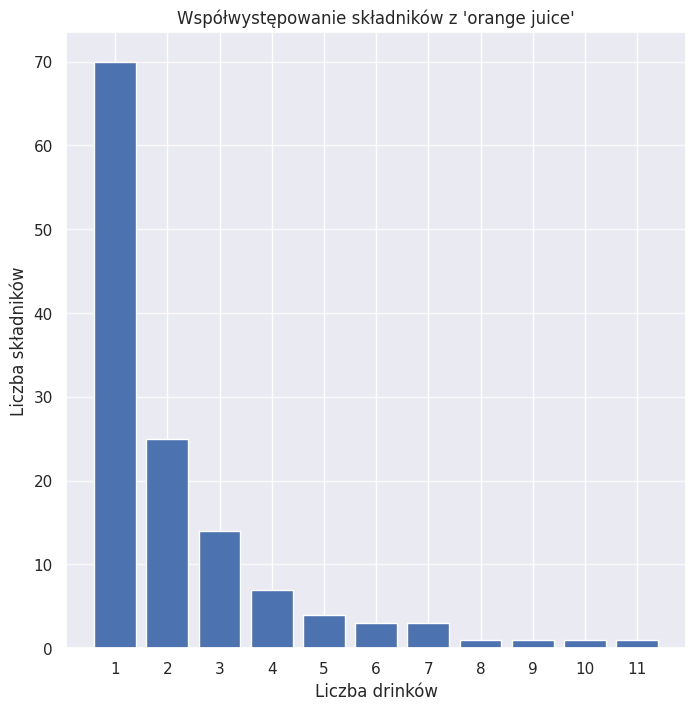

In [50]:
def plot_complement_distribution(ing):
  x_range = range(1, get_best_complement(ing)[1] + 1)
  num_of_complements = [len(H.neighbors(ing, s=i)) for i in x_range]

  plt.bar(x_range, num_of_complements)
  plt.xlabel("Liczba drinków")
  plt.xticks(x_range)
  plt.ylabel("Liczba składników")
  plt.title(f"Współwystępowanie składników z '{ing}'")
  plt.grid(axis='y', alpha=0.75)
  plt.show()

plot_complement_distribution("orange juice")

Załóżmy, że mamy jakiś ulubiony składnik i chcielibyśmy zrobić drinka, który by się z niego składał, ale nie wiemy co powinniśmy dokupić:

In [51]:
def get_best_complement_v2(ing): # do wyrzucenia chyba że coś zmienie
  i = 1
  while True:
    neighbors = list(H.neighbors(ing, s=i+1))
    print(neighbors)
    if len(neighbors) == 0: 
      return H.neighbors(ing, s=i), i
    i += 1

get_best_complement_v2('lime')


['angostura bitters', 'cachaca', 'coca-cola', 'elderflower cordial', 'gin', 'ginger ale', 'grenadine', 'ice', 'lemon', 'light rum', 'mint', 'passion fruit juice', 'powdered sugar', 'soda water', 'sugar', 'tonic water', 'vodka', 'white rum']
['cachaca', 'gin', 'ginger ale', 'ice', 'lemon', 'light rum', 'soda water', 'sugar']
['gin', 'ice', 'lemon', 'light rum', 'soda water', 'sugar']
['gin', 'ice', 'sugar']
['ice']
['ice']
[]


(['ice'], 7)

In [62]:
import random

fav_ing = random.choices(list(H.nodes))[0]
num_of_ing = 5
fav_ing ='papaya'
print(fav_ing)
new_drink = [fav_ing]
for i in range(num_of_ing-1):
    comp, s = get_best_complement(new_drink[-1])
    
    # print(comp)
    if len(comp) == 1 and comp[0] not in new_drink:
        new_drink.append(comp[0])
    elif len(comp) == 1 and comp[-1] in new_drink:
        for i in range(1,10):
            neighbors = comp.copy()
            if s-i>0:
                neighbors = H.neighbors(comp[-1], s=s-i)
                # print(f'neigh {neighbors}')

                new_choice = random.choice(neighbors)
                # print('choice', new_choice)
                if new_choice not in new_drink:
                    new_drink.append(new_choice)
                    break
            
    elif len(comp) > 1:
        new_drink.append(random.choice(comp))
        


new_drink


papaya


['papaya', 'kiwi', 'vodka', 'orange juice', 'gin']

/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

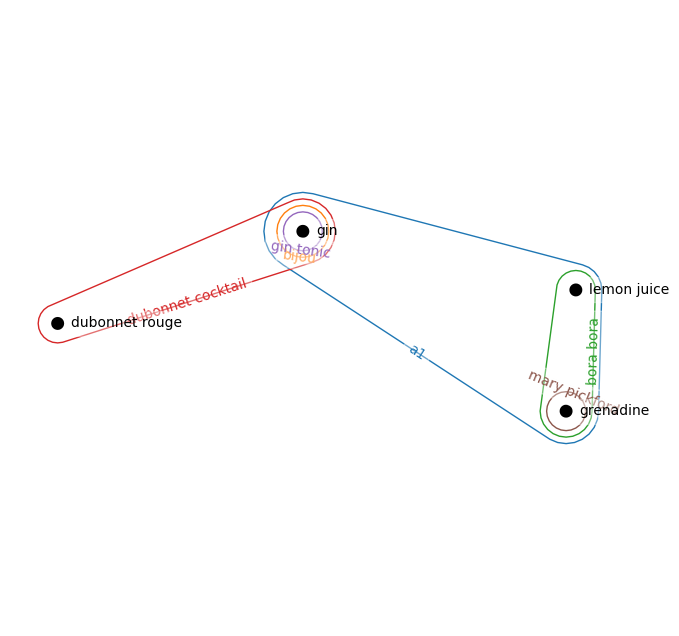

In [31]:
hnx.draw(H_small.restrict_to_nodes(new_drink))

#### Analiza connectedness

Narysujmy dla przypominenia małą sieć:

/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/home/bystry/.local/lib/python3.10

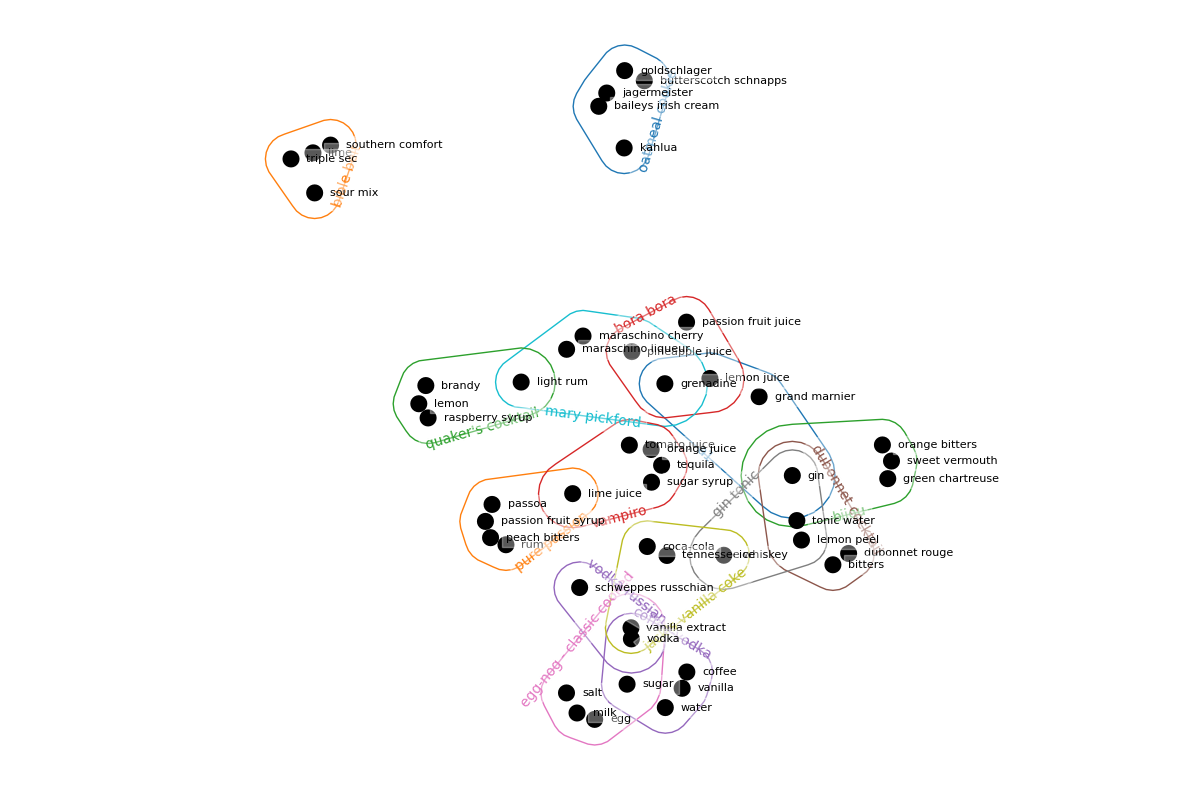

In [19]:
plt.figure(figsize=(15, 10))
hnx.draw(H_small, node_labels_kwargs={"fontsize": 8}, layout_kwargs={"seed": 314})

In [20]:
H_small.is_connected(s=1)

False

Mała sieć nie jest połączona, co zgadza się z rysunkiem.

Uogólnijmy to na całą sieć:

In [21]:
H.is_connected(s=1), H.is_connected(s=2)

(True, False)

Czyli duża sieć jest 1-connected ale nie jest 2-connected.

To znaczy, że jak weźmiemy 2 losowe węzły (składniki) to istnieje sekwencja krawędzi (drinków), która łączy te 2 węzły. Przy czym każde 2 krawędzie na tej ścieżce mają co najmniej 1 węzeł wspólny.

Własność ta nie zachodzi, kiedy będziemy rozważać ścieżkę w której każde 2 krawędzie mają co najmniej 2 wspóle węzły.

Spójrzymy jeszcze na liczbę komponentów:

In [22]:
len(list(H_small.s_components(s=1))), len(list(H.s_components(s=1)))

(4, 1)

Czyli mała sieć składa się z 4 komponentów, a duża z 1. Mowa tutaj o komponentach dla "s=1", czyli w takim klasycznym rozumieniu komponentów, jak w zwykłych grafach.

## Rozkład stopni węzłów

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")  # Set the plot style

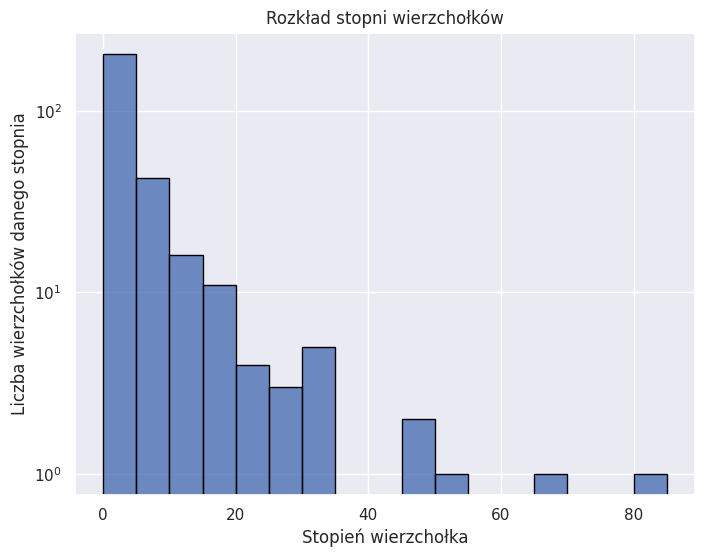

In [75]:
node_degrees = []

for ing in H.nodes:
    node_degrees.append(H.degree(ing))

# plt.hist(node_degrees)
plt.figure(figsize=(8, 6))
sns.histplot(node_degrees, bins=range(0,90,5), kde=False, color='#4068b0', edgecolor='black')
plt.xlabel("Stopień wierzchołka")
plt.ylabel("Liczba wierzchołków danego stopnia")
plt.yscale('log')
plt.title("Rozkład stopni wierzchołków")
plt.show()

Węzęł o największym stopniu:

In [24]:
highest_deg_ing, highest_deg = None, 0

for ing in H.nodes:
    if H.degree(ing) > highest_deg:
        highest_deg = H.degree(ing)
        highest_deg_ing = ing

highest_deg_ing, highest_deg

('gin', 84)

In [25]:
# node'y o degree >= 20
for ing in H.nodes:
    if (H.degree(ing) >= 20):
      print(ing, H.degree(ing))

lemon juice 50
light rum 31
water 28
triple sec 24
lime juice 32
gin 84
orange juice 46
ice 33
milk 21
vodka 67
lemon 33
pineapple juice 20
powdered sugar 25
coffee 23
lime 28
sugar 49
grenadine 31


takie rzeczy polecamy kupić każdemu barowi

In [26]:
# liczba składników
len(H.nodes)

294

In [27]:
import hypernetx.algorithms.hypergraph_modularity as hmod

K = hmod.kumar(H_small)

list(K)

/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:1616: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.083333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self._properties.loc[item_key, prop_name] = prop_val


[{'bitters',
  'dubonnet rouge',
  'gin',
  'green chartreuse',
  'ice',
  'lemon peel',
  'orange bitters',
  'sweet vermouth',
  'tonic water'},
 {'brandy',
  'grand marnier',
  'grenadine',
  'lemon',
  'lemon juice',
  'light rum',
  'maraschino cherry',
  'maraschino liqueur',
  'passion fruit juice',
  'pineapple juice',
  'raspberry syrup'},
 {'lime', 'sour mix', 'southern comfort', 'triple sec'},
 {'coca-cola',
  'coffee',
  'egg',
  'milk',
  'salt',
  'schweppes russchian',
  'sugar',
  'tennessee whiskey',
  'vanilla',
  'vanilla extract',
  'vodka',
  'water'},
 {'baileys irish cream',
  'butterscotch schnapps',
  'goldschlager',
  'jagermeister',
  'kahlua'},
 {'lime juice',
  'orange juice',
  'passion fruit syrup',
  'passoa',
  'peach bitters',
  'rum',
  'sugar syrup',
  'tequila',
  'tomato juice'}]

/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/home/bystry/.local/lib/python3.10

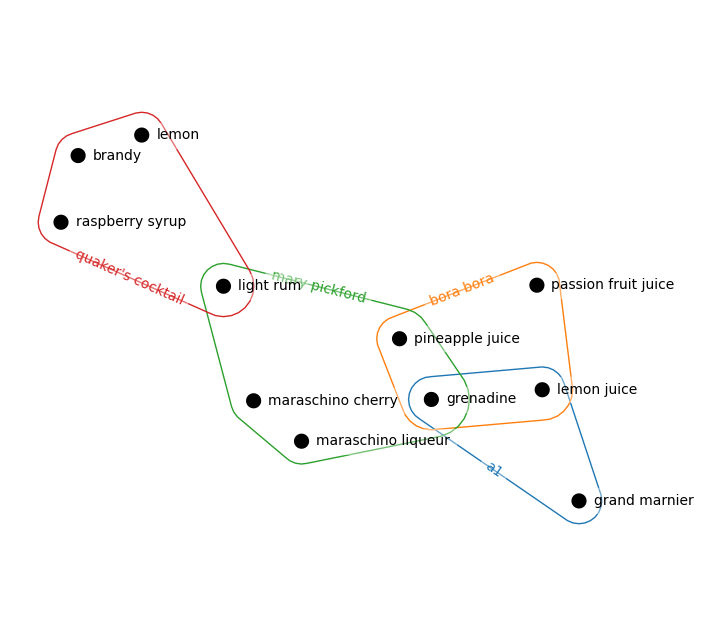

In [28]:
H_restriced = H_small.restrict_to_nodes(list(list(K)[1]))

hnx.draw(H_restriced)

/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


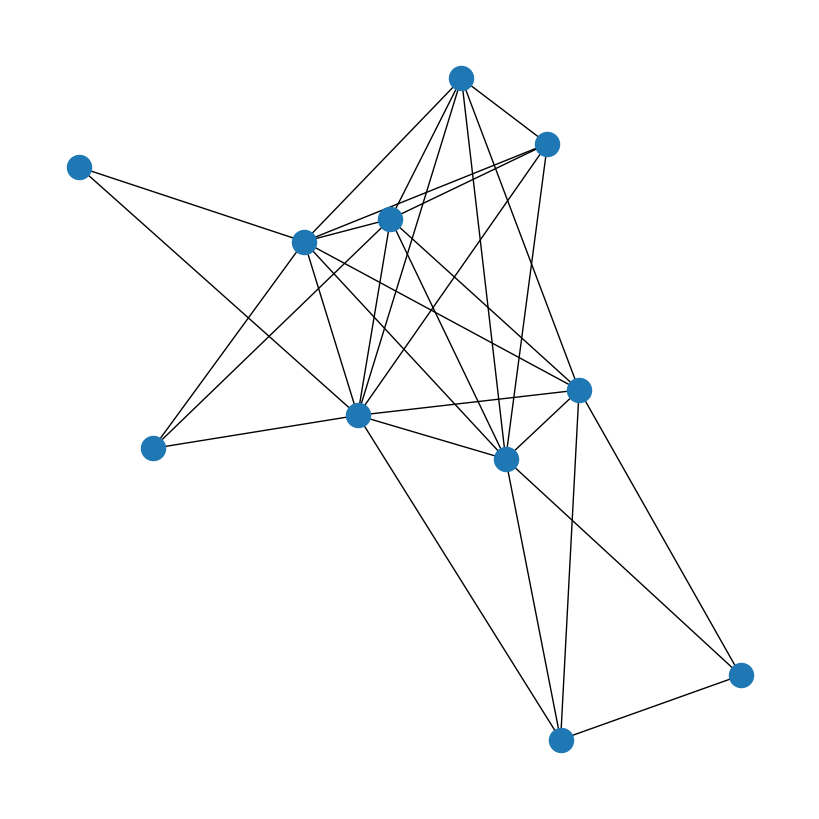

In [29]:
H_restriced = H.restrict_to_nodes(list(list(K)[1]))

g = H_restriced.get_linegraph(edges=False)
nx.draw(g)

In [30]:
def issubset(set1, set2):
    set1cpy = set1.copy()
    for i in set2:
        set1cpy.add(i)
    return len(set1cpy)-len(set1)

/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()


/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/home/bystry/.local/lib/python3.10/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/home/bystry/.local/lib/python3.10

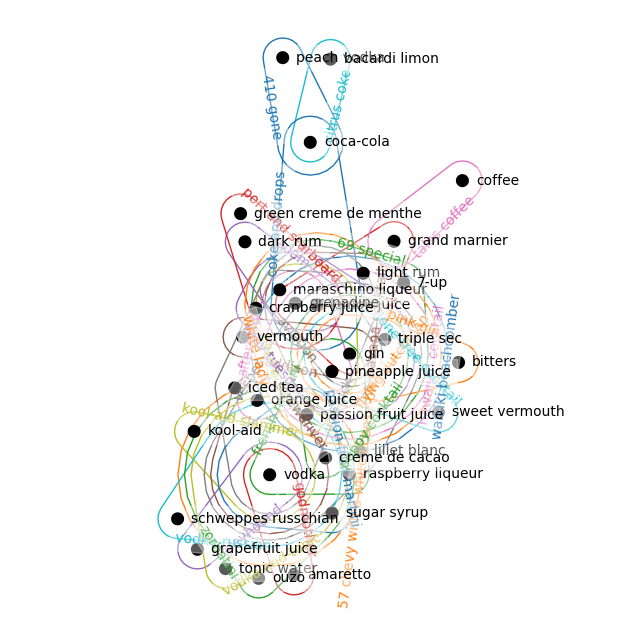

In [31]:
ings = {"grenadine", "coca-cola", "vodka", "lemon juice", "pineapple juice", "gin", "passion fruit juice", "grand marnier"}

can_be_made = []

treshold = 1

for edge in H.edges:
    if issubset(ings, set(H.incidence_dict[edge])) <= treshold:
        can_be_made.append(edge)

H_can_be_made = H.restrict_to_edges(can_be_made)
hnx.draw(H_can_be_made)

In [46]:
def getDrinks(ingridiens, treshold):
    can_be_made = []

    for edge in H.edges:
        if issubset(ingridiens, set(H.incidence_dict[edge])) <= treshold:
            can_be_made.append(edge)

    return can_be_made

In [47]:
getDrinks(ingridiens=ings, treshold=1)

['410 gone',
 '57 chevy with a white license plate',
 '69 special',
 'a1',
 'adam',
 'addison',
 'afterglow',
 'aviation',
 'bora bora',
 'citrus coke',
 'coke and drops',
 'flying dutchman',
 'french martini',
 'godmother',
 'greyhound',
 'havana cocktail',
 'hawaiian cocktail',
 'ice pick',
 'kool-aid slammer',
 'lone tree cocktail',
 'passion fruit martini',
 'pink gin',
 'poppy cocktail',
 'port and starboard',
 'ruby tuesday',
 'screwdriver',
 'talos coffee',
 'vesper',
 'vodka and tonic',
 'vodka russian',
 'waikiki beachcomber',
 'white lady',
 'zorbatini']

proponowanie zamienników

In [34]:
def findPaths(G,u,n):
    if n==0:
        return [[u]]
    paths = [[u]+path for neighbor in G.neighbors(u) for path in findPaths(G,neighbor,n-1) if u not in path]
    return paths

In [35]:
def substitutes(ingridient: str):
    G = H.get_linegraph(edges=False)
    paths = findPaths(G, ingridient, 2)
    substitutes = []
    for path in paths:
        substitutes.append(path[2])
    return substitutes


In [41]:
from collections import Counter


def findSubstitutes(ingridient):
    a = substitutes(ingridient)
    counter = Counter(a)
    most_common_element = counter.most_common(400)
    d = dict(most_common_element)
    max_value = max(d.values())
    return [k for k,v in d.items() if v == max_value and ingredients_categories[ingridient] == ingredients_categories[k]]


In [48]:
findSubstitutes("whisky")

['amaretto',
 'chambord raspberry liqueur',
 'frangelico',
 'grand marnier',
 'irish whiskey',
 'kahlua',
 'vodka']

In [43]:
ingredients = pd.DataFrame(list(ingredients_categories.items()), columns=['Skladnik', 'Kategoria'])

In [33]:
import random

ing = 'vodka'
community = None
for com in K:
    if ing in com:
        community = list(com)
        break
if len(community)<5:
    print(community)
else:
    community.remove(ing)
    for s in range(2, 5):
        while True:
            x = random.sample(community,s)
            x.append(ing)
            categories = ingredients[ingredients['Skladnik'].isin(x)]['Kategoria'].unique()
            if 'alkohol' in categories and 'napoj' in categories:
                print(x)
                break

NameError: name 'K' is not defined

random

In [11]:
import random 
fav_ing = random.choices(list(H.nodes))[0]
num_of_ing = 5
print(fav_ing)
new_drink = [fav_ing]
for i in range(num_of_ing-1):
    
    neighbors = H.neighbors(new_drink[-1])
    comp = random.choice(neighbors)
    
    if comp not in new_drink:
        new_drink.append(comp)
    elif comp in new_drink:
        
        for i in range(1,10):
            neighbors = H.neighbors(comp)
            # print(f'neigh {neighbors}')

            new_choice = random.choice(neighbors)
            # print('choice', new_choice)
            if new_choice not in new_drink:
                new_drink.append(new_choice)
                break
            


new_drink

sugar


['sugar', '151 proof rum', 'galliano', 'orange juice', 'rum']

/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/mnt/d/Coding/Python/sieci/complex-networks-of-drinks/.venv/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

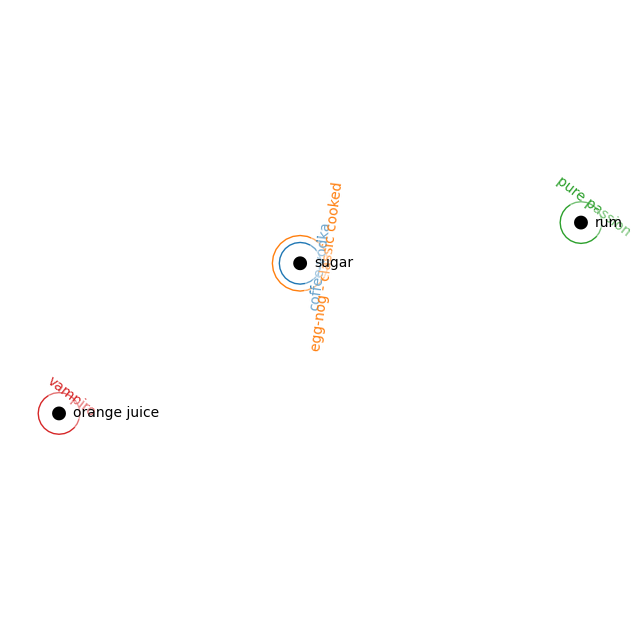

In [12]:
hnx.draw(H_small.restrict_to_nodes(new_drink))